In [1]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
with open("analysis/society-ipd-large.pickle", "rb") as f:
    data = pickle.load(f)

In [3]:
reward_df = pd.DataFrame(
    [
        ["train", population, lb, reward]
        for (population, lb, t), rewards in data["train_mean_reward"].items()
        for reward in rewards
    ]
    + [
        ["test", population, lb, reward]
        for (population, lb, t), rewards in data["test_mean_reward"].items()
        for reward in rewards
    ],
    columns=["phase", "population", "lookback", "mean_reward"],
)

reward_df

,phase,population,lookback,mean_reward
0,train,1024,1,2.896807
1,train,1024,1,2.892362
2,train,1024,1,2.881821
3,train,1024,1,2.876899
4,train,1024,1,2.888815
...,...,...,...,...
385,test,2048,3,2.965381
386,test,2048,3,2.966651
387,test,2048,3,2.965153
388,test,2048,3,2.964642


In [4]:
agg_df = reward_df.groupby(["phase", "population", "lookback"]).agg(
    {"mean_reward": ["mean", "std"]}
)

agg_df

mean_reward          
                                 mean       std
phase population lookback                      
test  1024       1           2.924916  0.010693
                 2           2.960741  0.004448
                 3           2.967322  0.003146
                 4           2.972469  0.002596
                 5           2.974200  0.002701
      2048       1           2.946800  0.003668
                 2           2.959053  0.003148
                 3           2.965377  0.002115
                 4           2.969916  0.002473
                 5           2.971132  0.002032
train 1024       1           2.888469  0.005767
                 2           2.893964  0.003944
                 3           2.890095  0.002450
                 4           2.889028  0.002439
                 5           2.885151  0.002259
      2048       1           2.892439  0.003218
                 2           2.894855  0.002847
                 3           2.892129  0.002070
                 4           2.891504  0.001926
                 5           2.889132  0.001590

In [5]:
pivoted_df = (
    agg_df.reset_index()
    .pivot(["phase", "population"], columns="lookback")
    .reset_index()
)

pivoted_df

C:\Users\jerem\AppData\Local\Temp/ipykernel_8888/913573291.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_df = agg_df.reset_index().pivot(["phase", "population"], columns="lookback").reset_index()


phase population mean_reward                                \
                                  mean                                 
lookback                             1         2         3         4   
0          test       1024    2.924916  2.960741  2.967322  2.972469   
1          test       2048    2.946800  2.959053  2.965377  2.969916   
2         train       1024    2.888469  2.893964  2.890095  2.889028   
3         train       2048    2.892439  2.894855  2.892129  2.891504   

                                                                      
                         std                                          
lookback         5         1         2         3         4         5  
0         2.974200  0.010693  0.004448  0.003146  0.002596  0.002701  
1         2.971132  0.003668  0.003148  0.002115  0.002473  0.002032  
2         2.885151  0.005767  0.003944  0.002450  0.002439  0.002259  
3         2.889132  0.003218  0.002847  0.002070  0.001926  0.001590

In [6]:
for _, row in pivoted_df[pivoted_df["phase"] == "train"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

1024	&	$2.888 \pm 0.006$	&	$2.894 \pm 0.004$	&	$2.890 \pm 0.002$	&	$2.889 \pm 0.002$	&	$2.885 \pm 0.002$ \\
2048	&	$2.892 \pm 0.003$	&	$2.895 \pm 0.003$	&	$2.892 \pm 0.002$	&	$2.892 \pm 0.002$	&	$2.889 \pm 0.002$ \\


In [7]:
for _, row in pivoted_df[pivoted_df["phase"] == "test"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

1024	&	$2.925 \pm 0.011$	&	$2.961 \pm 0.004$	&	$2.967 \pm 0.003$	&	$2.972 \pm 0.003$	&	$2.974 \pm 0.003$ \\
2048	&	$2.947 \pm 0.004$	&	$2.959 \pm 0.003$	&	$2.965 \pm 0.002$	&	$2.970 \pm 0.002$	&	$2.971 \pm 0.002$ \\


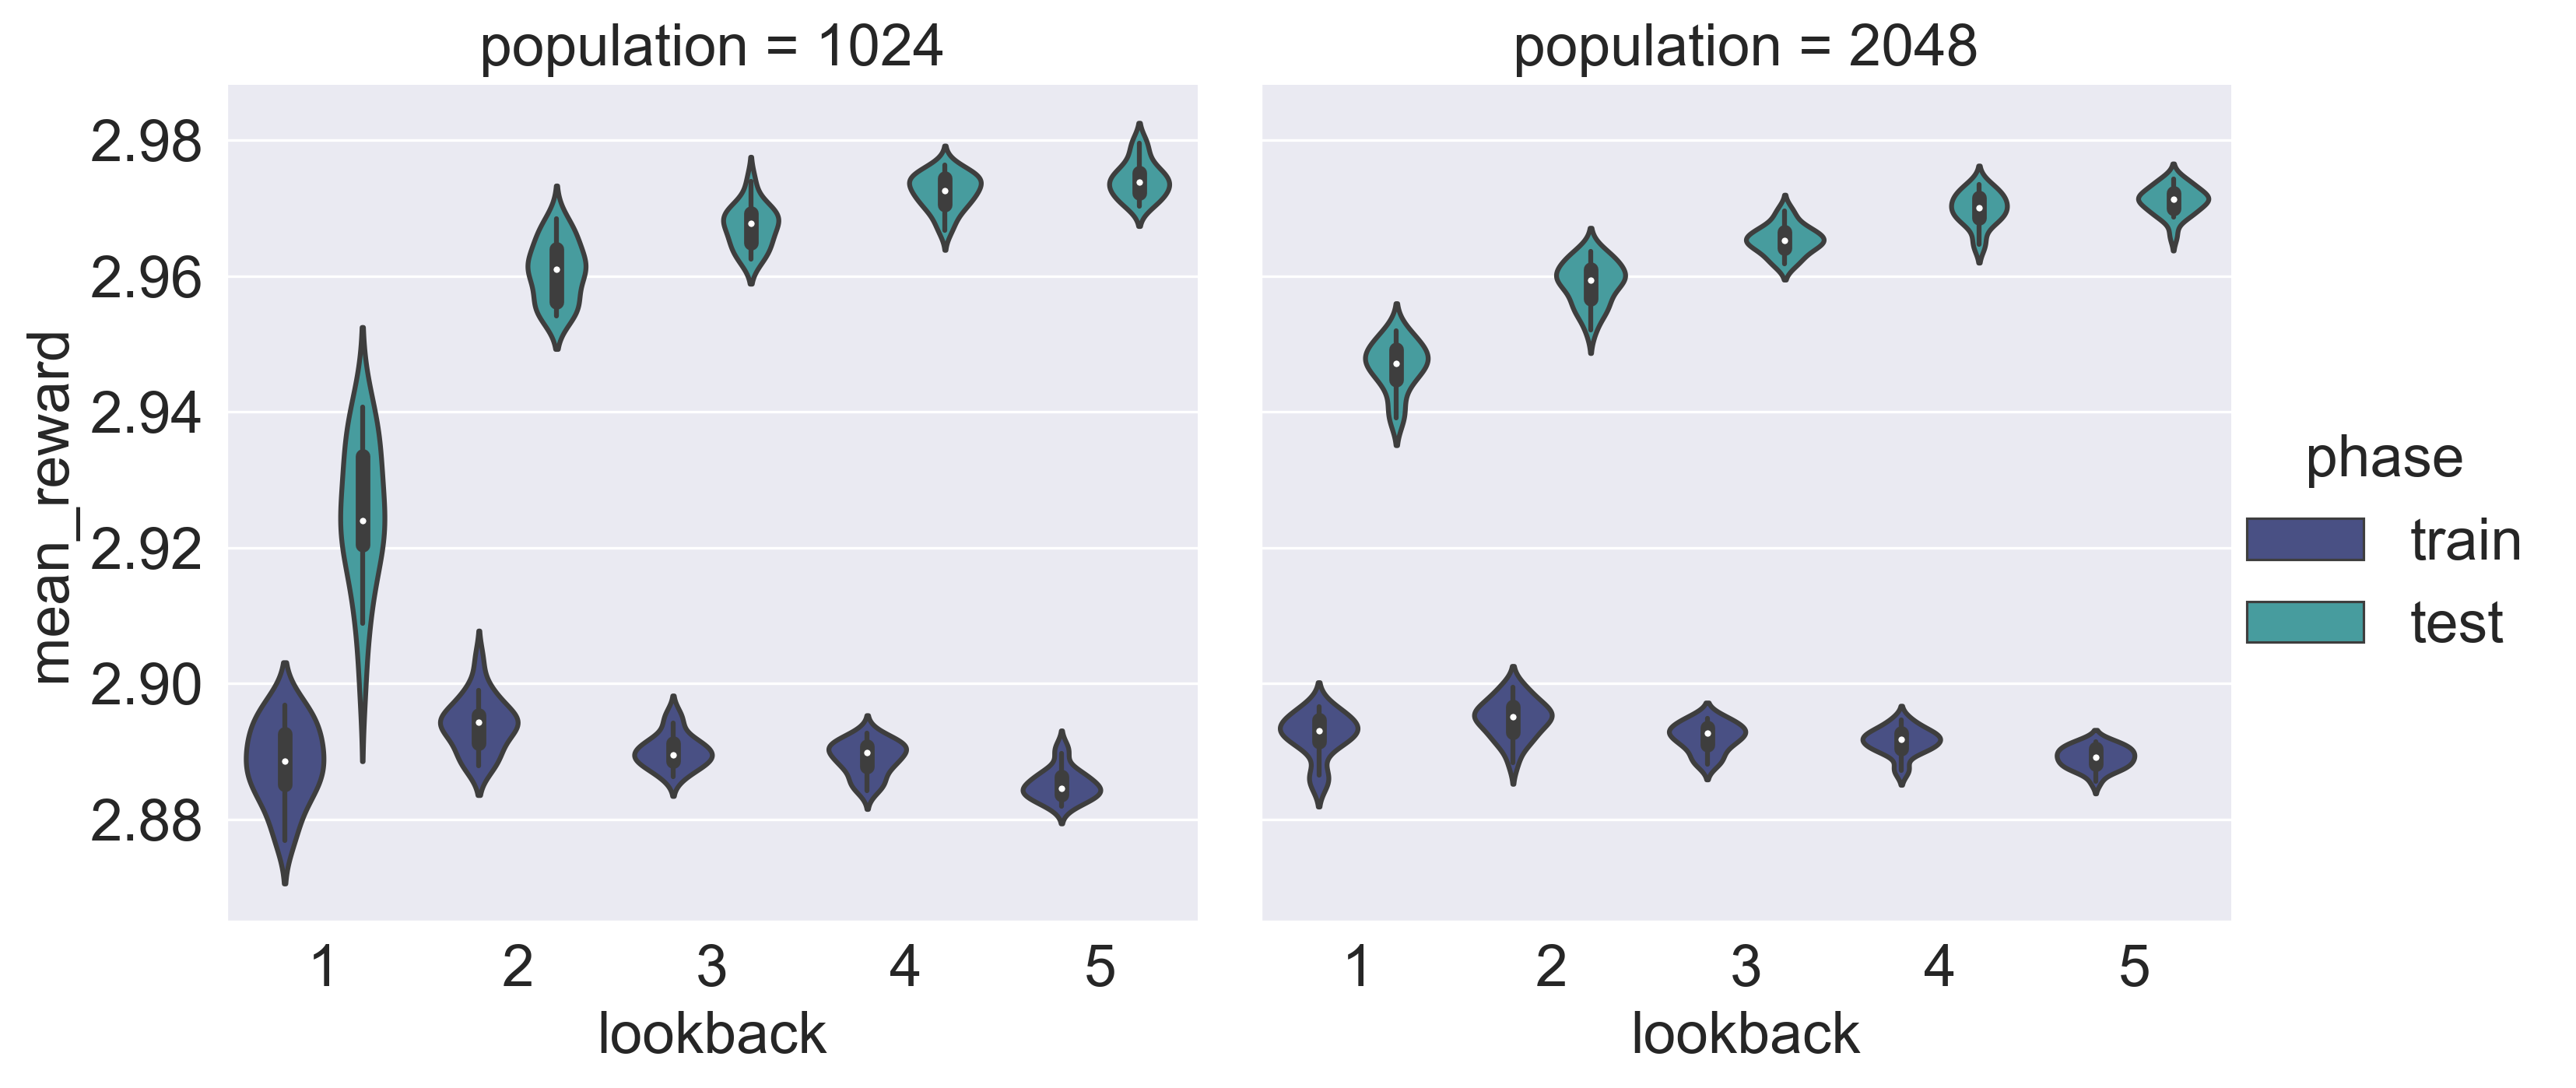

In [8]:
sns.set_style("darkgrid")

g = sns.catplot(
    reward_df,
    x="lookback",
    y="mean_reward",
    col="population",
    col_wrap=2,
    hue="phase",
    palette="mako",
    kind="violin",
)